In [1]:
import numpy as np
import os
import keras as ks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from prettytable import PrettyTable

In [2]:
Conv3D = ks.layers.Conv3D
MaxPooling3D = ks.layers.MaxPooling3D
Dense = ks.layers.Dense
Dropout = ks.layers.Dropout
Flatten = ks.layers.Flatten
Sequential = ks.models.Sequential
Activation = ks.layers.Activation
ZeroPadding3D = ks.layers.ZeroPadding3D
TimeDistributed = ks.layers.TimeDistributed
LSTM = ks.layers.LSTM
GRU = ks.layers.GRU
Reshape = ks.layers.Reshape
plot_model = ks.utils.plot_model

In [18]:
import os
import json
import numpy as np

# Set the directory path
dir_path = "D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six"

# Set the dimensions of each frame
height, width, channels = 80, 112, 3

# Initialize arrays to store the video frames and their corresponding labels
videos = []
labels = []

# Loop through each word folder and extract video frames
for root, dirs, files in os.walk(dir_path):
    for file in files:
        if file == "data.txt":
            # Print the current processing word folder for tracking
            print(f"Processing folder: {root}")

            # Extract the label from the directory name (splitting before the "_x")
            label = root.split("\\")[-1].split("_")[0]

            # Read the contents of the data.txt file
            with open(os.path.join(root, file), 'r') as f:
                data_str = f.read()

            # Check if the content of data.txt matches the expected structure
            try:
                # Evaluate the contents of the text file as a Python expression
                data_list = json.loads(data_str)

                # Convert the list to a numpy array
                data_array = np.array(data_list)

                # Verify that the data shape is correct before reshaping
                num_frames = len(data_list)
                if num_frames == 60:  # Ensure the expected 60 frames are present
                    frames = data_array.reshape((num_frames, height, width, channels))

                    # Append the frames and label to the videos and labels arrays
                    videos.append(frames)
                    labels.append(label)
                else:
                    print(f"Warning: Number of frames in {root} is not 60. Skipping folder.")

            except (ValueError, json.JSONDecodeError) as e:
                print(f"Error processing {root}/data.txt: {e}")

print("Labels:", labels)

Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\bat_1
Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\bat_11
Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\bat_12
Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\bat_13
Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\bat_2
Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\bat_3
Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\big_1
Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\big_11
Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\big_12
Processing folder: D:/PycharmProjects/pro_dis_2/collected_data/complete_datasets_crop_six\big_13
Processing folder: D:/PycharmProje

In [19]:
# Convert the videos and labels arrays to NumPy arrays
videos = np.array(videos)
labels = np.array(labels)

# Save the videos and labels as separate .npy files
np.save("collected_data/npy_files_seven/videos.npy", videos)
np.save("collected_data/npy_files_seven/labels.npy", labels)
print("Saved videos.npy and labels.npy successfully.")

Saved videos.npy and labels.npy successfully.


In [9]:
videos = np.load('collected_data/npy_files_seven/videos.npy')
labels = np.load('collected_data/npy_files_seven/labels.npy')

In [10]:
# Print the shape of the videos and labels arrays
print("Videos shape:", videos.shape)
print("Labels shape:", labels.shape)

Videos shape: (60, 60, 80, 112, 3)
Labels shape: (60,)


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize and fit the LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)

# Transform the labels into encoded integers
encoded_labels = encoder.transform(labels)
labels = encoded_labels

# Create the label dictionary
label_dict = {index: str(label) for index, label in enumerate(encoder.classes_)}

# Print the encoded labels and label dictionary to verify
print("Encoded labels:", labels)
print("Label Dictionary:", label_dict)

Encoded labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
Label Dictionary: {0: 'bat', 1: 'big', 2: 'book', 3: 'car', 4: 'cat'}


In [6]:
len(labels)

100

In [7]:
from sklearn.model_selection import train_test_split

# Assuming `videos` and `labels` arrays are already prepared as in your scenario
# `videos` should have the shape (600, 60, 80, 112, 3)
# `labels` should have the shape (600,)

# Split the data into training and validation sets with a 20% split for testing
X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.2, random_state=42)

# Output the shape of the splits for verification
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Optionally, clear the memory of `videos` if it's no longer needed
del videos

Training set shape: (80, 60, 80, 112, 3) (80,)
Test set shape: (20, 60, 80, 112, 3) (20,)


In [8]:
import gc
import psutil

# Collect garbage to free up memory
gc.collect()

# Check memory information on Windows
memory_info = psutil.virtual_memory()
print(f"Total Memory: {memory_info.total / (1024 ** 3):.2f} GB")
print(f"Available Memory: {memory_info.available / (1024 ** 3):.2f} GB")
print(f"Used Memory: {memory_info.used / (1024 ** 3):.2f} GB")
print(f"Memory Usage: {memory_info.percent}%")

Total Memory: 15.35 GB
Available Memory: 7.79 GB
Used Memory: 7.56 GB
Memory Usage: 49.3%


In [12]:
import numpy as np

# Assuming `labels` is the array of encoded labels from your dataset
# Assuming `label_dict` is a dictionary mapping label indices to word names

# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Find the maximum length of the class names for alignment
max_len = max([len(label_dict[i]) for i in range(len(label_dict))])

# Print the distribution of classes
print("Class Distribution in Dataset:")
for i, count in enumerate(counts):
    class_name = label_dict[i].ljust(max_len)
    print(f"{class_name}  {count} counts")

Class Distribution in Dataset:
bat   20 counts
big   20 counts
book  20 counts
car   20 counts
cat   20 counts


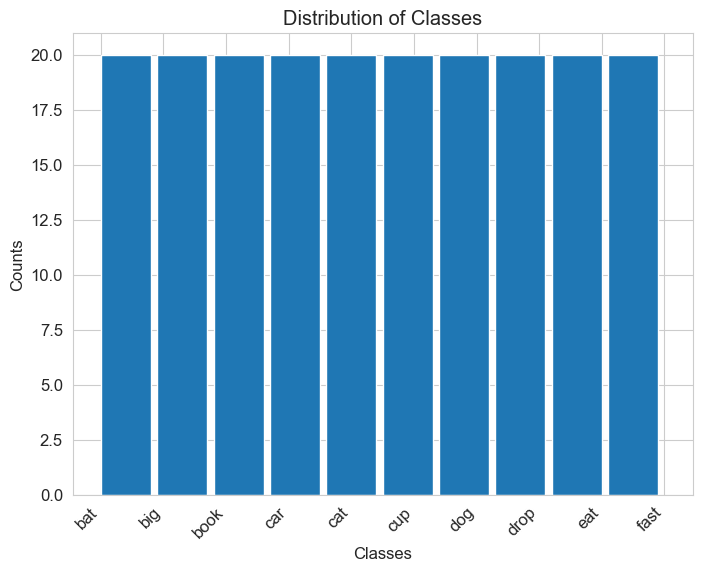

In [10]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

# Plot the histogram
plt.hist(labels, bins=len(classes), width=0.8)
plt.xticks(range(len(classes)), [label_dict[i] for i in range(len(classes))], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Classes')

# Display the plot
plt.show()

model 1

In [13]:
# # Define the input shape based on the frames and dimensions of your data
# input_shape = (60, 80, 112, 3)  # Adjusted to fit the 60 frames in each video, with frame size 80x112 in RGB
#
# # Define the model architecture
# model = Sequential()
# model.add(Conv3D(8, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
# model.add(MaxPooling3D((2, 2, 2)))
# model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(MaxPooling3D((2, 2, 2)))
# model.add(Conv3D(256, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(5, activation='softmax'))  # Adjusted to match 5 unique words
#
# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#
# # Convert the target labels to one-hot encoding
# y_train_onehot = tf.keras.utils.to_categorical(y_train)
# y_test_onehot = tf.keras.utils.to_categorical(y_test)
#
# # Display the model summary to confirm the architecture
# model.summary()
#
# # Optionally, start training the model with the training data
# # model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)

D:\PycharmProjects\pro_dis_2\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 58, 78, 110, 8) │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 29, 39, 55, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 27, 37, 53, 32) │         6,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 13, 18, 26, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 11, 16, 24,     │       221,440 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1081344)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │ 1,107,297,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,107,805,493 (4.13 GB)

 Trainable params: 1,107,805,493 (4.13 GB)

 Non-trainable params: 0 (0.00 B)

model 2

In [14]:
# Define the input shape based on the frames and dimensions of your data
input_shape = (60, 80, 112, 3)  # Adjusted to fit the 60 frames in each video, with frame size 80x112 in RGB

# Define the model architecture
model = Sequential()
model.add(Conv3D(8, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(256, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # Adjusted to match 5 unique words

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert the target labels to one-hot encoding
y_train_onehot = tf.keras.utils.to_categorical(y_train)
y_test_onehot = tf.keras.utils.to_categorical(y_test)

# Display the model summary to confirm the architecture
model.summary()

# Optionally, start training the model with the training data
# model.fit(X_train, y_train_onehot, validation_data=(X_test, y_test_onehot), epochs=10, batch_size=32)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_15 (Conv3D)              │ (None, 58, 78, 110, 8) │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_10 (MaxPooling3D) │ (None, 29, 39, 55, 8)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_16 (Conv3D)              │ (None, 27, 37, 53, 32) │         6,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_11 (MaxPooling3D) │ (None, 13, 18, 26, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_17 (Conv3D)              │ (None, 11, 16, 24,     │       221,440 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1081344)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │   553,648,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 554,025,781 (2.06 GB)

 Trainable params: 554,025,781 (2.06 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model and record the training history
history = model.fit(
    X_train,               # Training data (input videos)
    y_train_onehot,        # Training labels in one-hot encoded format
    epochs=20,             # Number of epochs (adjustable based on performance)
    batch_size=16,         # Batch size for training
    validation_data=(X_test, y_test_onehot)  # Validation data and labels
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 104s 19s/step - accuracy: 0.2382 - loss: 2354.7344 - val_accuracy: 0.1500 - val_loss: 1.7193
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 89s 16s/step - accuracy: 0.2769 - loss: 3.5218 - val_accuracy: 0.3000 - val_loss: 1.6768
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 136s 29s/step - accuracy: 0.3247 - loss: 1.6634 - val_accuracy: 0.5000 - val_loss: 1.6753
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 151s 30s/step - accuracy: 0.2823 - loss: 1.7065 - val_accuracy: 0.2500 - val_loss: 1.6794
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 148s 30s/step - accuracy: 0.3266 - loss: 2.1933 - val_accuracy: 0.1500 - val_loss: 1.7166
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 129s 27s/step - accuracy: 0.2094 - loss: 1.7473 - val_accuracy: 0.2000 - val_loss: 1.6878
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 132s 27s/step - accuracy: 0.2012 - loss: 1.6868 - val_accuracy: 0.2500 - val_loss: 1.6859
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 126s 24s/step - accuracy: 0.2186 - loss: 1.6948 - val_accuracy: 0.1500 - val_los